In [44]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [45]:
!pip install spacy

In [46]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 4.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [47]:
!python -m spacy download en

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [48]:
import spacy

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [50]:
# Data Collection

tweets = pd.read_excel(r'C:\Users\ASUS\Desktop\Capstone project\data.world Export CoronaVirus Automated Accounts by KUNGFU.AI.xlsx')

In [51]:
tweets.head()

,Rank,Influence \nScore,Date of Max \nInfluence,Tweet
0,1,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
1,2,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
2,3,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
3,4,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
4,5,31.0,2020-02-04,@Independent: Hong Kong hospital workers str...


In [52]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Rank                    766 non-null    int64         
 1   Influence 
Score        226 non-null    float64       
 2   Date of Max 
Influence  226 non-null    datetime64[ns]
 3   Tweet                   226 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 24.1+ KB


In [53]:
# Data Preprocessing using spaCy model
nlp = en_core_web_md.load()

In [54]:
#Converting the field to strings
tweets['Tweet']= tweets['Tweet'].astype(str)

In [55]:
# Tags that need to be removed
words_removed= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

In [56]:
for Tweet in nlp.pipe(tweets['Tweet']):
   proj_tok = [token.lemma_.lower() for token in Tweet if token.pos_ not in words_removed and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [57]:
#New column with stopwords removed
tweets['Tweet'] = tokens

In [58]:
tweets['Tweet']

0      [doctor, hong, kong, say, understand, health, ...
1      [doctor, hong, kong, say, understand, health, ...
2      [hundred, hong, kong, hospital, worker, go, st...
3      [hundred, hong, kong, hospital, worker, go, st...
4      [hong, kong, hospital, worker, strike, second,...
                             ...                        
761                                                [nan]
762                                                [nan]
763                                                [nan]
764                                                [nan]
765                                                [nan]
Name: Tweet, Length: 766, dtype: object

In [59]:
# Creating dictionary
dictionary = Dictionary(tweets['Tweet'])

In [60]:
print(dictionary.token2id) #585 Unique IDs

{'care': 0, 'china': 1, 'coronavirus': 2, 'doctor': 3, 'don': 4, 'health': 5, 'hong': 6, 'kong': 7, 'protest': 8, 'say': 9, 'spread': 10, 'understand': 11, 'worker': 12, 'border': 13, 'demand': 14, 'go': 15, 'government': 16, 'hospital': 17, 'hundred': 18, 'mainland': 19, 'shutter': 20, 'strike': 21, 'closure': 22, 'crisis': 23, 'day': 24, 'second': 25, 'citizen': 26, 'country': 27, 'epicenter': 28, 'evacuate': 29, 'hubei': 30, 'province': 31, 'th': 32, 'centre': 33, 'deadly': 34, 'home': 35, 'leave': 36, 'outbreak': 37, 'pet': 38, 'wuhan': 39, 'chunying': 40, 'foreign': 41, 'hua': 42, 'information': 43, 'jan': 44, 'ministry': 45, 'share': 46, 'spokeperson': 47, 'xi': 48, 'city': 49, 'close': 50, 'coronaviru': 51, 'medical': 52, 'reduce': 53, 'car': 54, 'death': 55, 'die': 56, 'person': 57, 'place': 58, 'repo': 59, 'borde': 60, 'hundreds': 61, 'monday': 62, 'shut': 63, 'block': 64, 'urge': 65, 'virus': 66, 'npr': 67, 'del': 68, 'es': 69, 'esta': 70, 'evitar': 71, 'la': 72, 'medida': 73

In [61]:
#Filtering low frequency and high frequency tokens
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [62]:
#Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in tweets['Tweet']]

In [63]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(0, 1),
  (1, 1),
  (4, 1),
  (5, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (14, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1)],
 [(0, 1), (1, 1), (24, 1), (25, 1)],
 [(0, 1), (1, 1), (7, 1)],
 [(0, 1),
  (1, 1),
  (4, 1),
  (5, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (14, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(0, 1),
  (4, 1),
  (5

In [86]:
# Model Building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=25, num_topics=10, workers = 4, passes=10)

In [87]:
lda_model

In [88]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [89]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [90]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=tweets['Tweet']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tweets['Tweet'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\76117054.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\76117054.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9182,"coronavirus, china, hong, kong, outbreak, ange...","[doctor, hong, kong, say, understand, health, ..."
1,1,3,0.9182,"coronavirus, china, hong, kong, outbreak, ange...","[doctor, hong, kong, say, understand, health, ..."
2,2,8,0.9357,"china, kong, hong, government, strike, worker,...","[hundred, hong, kong, hospital, worker, go, st..."
3,3,8,0.9357,"china, kong, hong, government, strike, worker,...","[hundred, hong, kong, hospital, worker, go, st..."
4,4,0,0.9357,"coronavirus, closure, border, kong, hong, work...","[hong, kong, hospital, worker, strike, second,..."
5,5,7,0.5500,"o, late, kong, hong, demand, number, people, u...","[country, evacuate, citizen, hubei, province, ..."
6,6,3,0.8200,"coronavirus, china, hong, kong, outbreak, ange...","[pet, leave, wuhan, home, centre, china, deadl..."
7,7,3,0.7750,"coronavirus, china, hong, kong, outbreak, ange...","[foreign, ministry, spokeperson, hua, chunying..."
8,8,0,0.9357,"coronavirus, closure, border, kong, hong, work...","[hong, kong, hospital, worker, strike, second,..."
9,9,8,0.9357,"china, kong, hong, government, strike, worker,...","[hundred, hong, kong, hospital, worker, go, st..."


C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

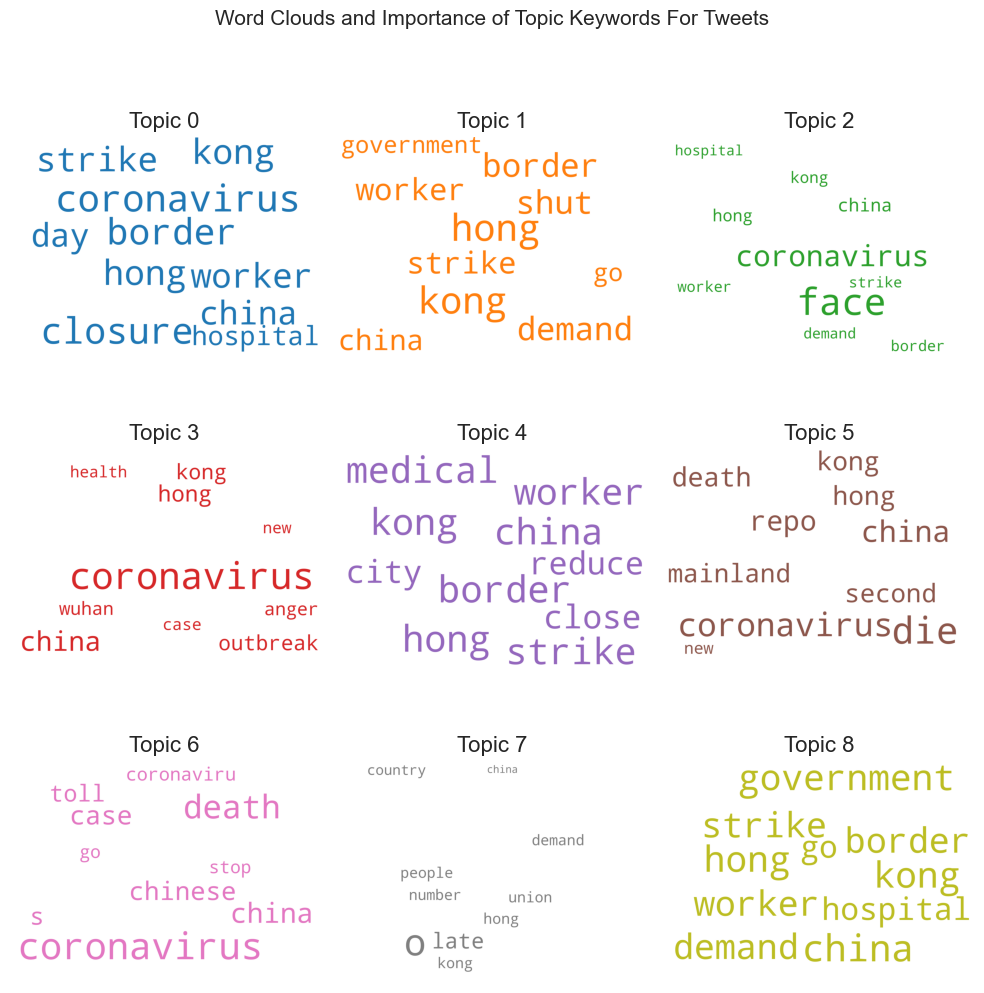

In [91]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.suptitle('Word Clouds and Importance of Topic Keywords For Tweets', fontsize=15, y=1.05) 
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\800518462.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=40, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\800518462.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=40, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\800518462.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=40, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15992\800518462.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=40, horizontalalignment= 'right')


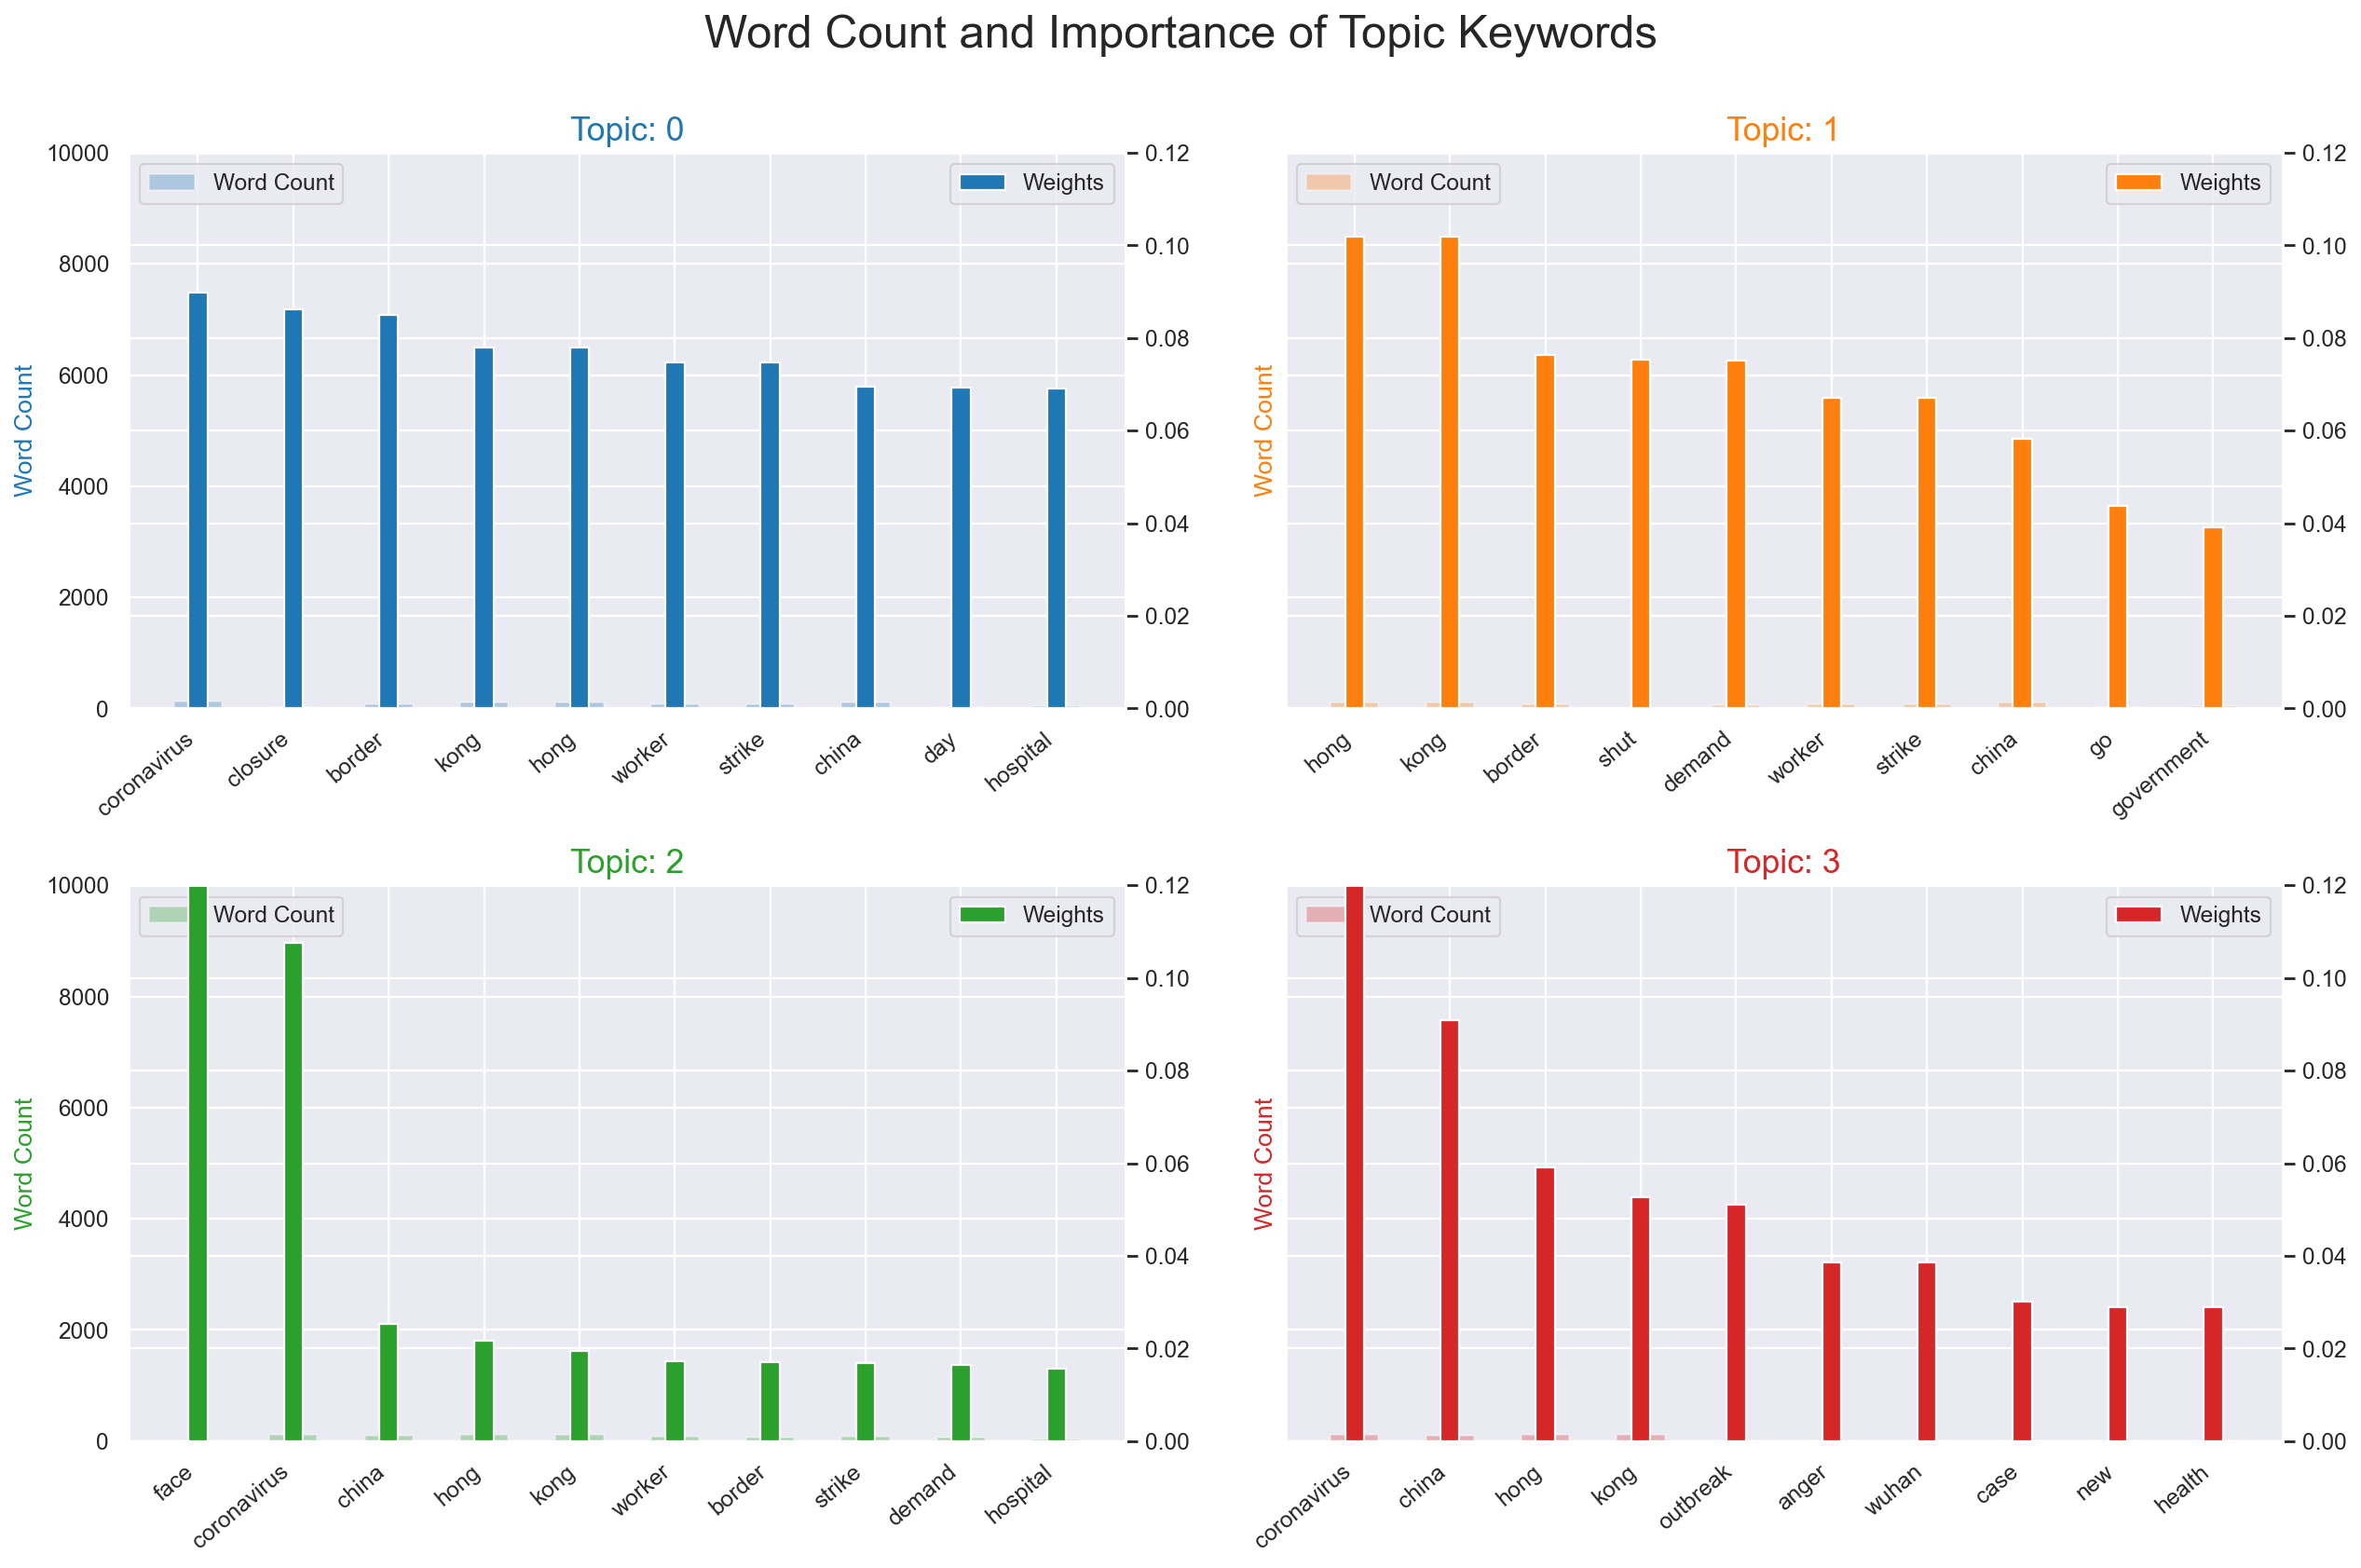

In [105]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in tweets['Tweet'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.12); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=40, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [93]:
# Compute Perplexity Score
print('nPerplexity Score: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets['Tweet'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nPerplexity Score:  -3.77775101599612
nCoherence Score:  0.47208983713616937


In [46]:
# supporting function  
def compute_coherence_values(corpus, dictionary, k, a, b):      
    lda_model = gensim.models.LdaMulticore(corpus=corpus,  
                                           id2word=id2word,  
                                           num_topics=k,   
                                           random_state=100,  
                                           chunksize=100,  
                                           passes=10,  
                                           alpha=a,  
                                           eta=b,  
                                           per_word_topics=True)  
      
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets['Tweet'], dictionary=dictionary, coherence='c_v')  
      
    return coherence_model_lda.get_coherence()  

In [65]:
import gensim
from gensim.utils import simple_preprocess

In [51]:
%%time  
import numpy as np  
import tqdm  
grid = {}  
grid['Validation_Set'] = {}  
# Topics range  
min_topics = 2  
max_topics = 11  
step_size = 1  
topics_range = range(min_topics, max_topics, step_size)  
# Alpha parameter  
alpha = list(np.arange(0.01, 1, 0.3))  
alpha.append('symmetric')  
alpha.append('asymmetric')  
# Beta parameter  
beta = list(np.arange(0.01, 1, 0.3))  
beta.append('symmetric')  
# Validation sets  
num_of_docs = len(corpus)  
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25),   
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),   
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75),   
               corpus]  
corpus_title = ['75% Corpus', '100% Corpus']  
model_results = {'Validation_Set': [],  
                 'Topics': [],  
                 'Alpha': [],  
                 'Beta': [],  
                 'Coherence': []  
                }  
# Can take a long time to run  
if 1 == 1:  
    loop_num = len(corpus_sets) * len(topics_range) * len(alpha) * len(beta)  
    pbar = tqdm.tqdm(total=loop_num)  
      
    # iterate through validation corpuses  
    iter_i = 0  
    for i in range(len(corpus_sets)):  
        # iterate through number of topics  
        for k in topics_range:  
            # iterate through alpha values  
            for a in alpha:  
                # iterare through beta values  
                for b in beta:  
                    # get the coherence score for the given parameters  
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)  
                    # Save the model results  
                    model_results['Validation_Set'].append(corpus_title[i])  
                    model_results['Topics'].append(k)  
                    model_results['Alpha'].append(a)  
                    model_results['Beta'].append(b)  
                    model_results['Coherence'].append(cv)  
                                          
                    pbar.update(1)                      
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)  
    pbar.close()  


  0%|          | 0/270 [00:22<?, ?it/s]
C:\Users\ASUS\anaconda3\lib\site-packages\gensim\models\ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)

100%|██████████| 270/270 [38:15<00:00,  8.50s/it]

Wall time: 38min 15s


In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus1, num_topics=num_topics, id2word=id2word1,random_seed = 96)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [53]:

# Prepare the data for drawing chart  
target_alpha = 0.01  
target_beta = 0.01  
topic_nums = list(range(2, 11))  
target_co_pos_set = set()  
for i, t in enumerate(zip(model_results['Alpha'], model_results['Beta'])):  
    if t[0] == target_alpha and t[1] == target_beta:  
        target_co_pos_set.add(i)  
          
coherences = []  
for i, co in enumerate(model_results['Coherence']):  
    if i in target_co_pos_set:  
        coherences.append(co)  
          
for topic_num, coherence in zip(topic_nums, coherences):  
    print("Topic number={} with coherence value={:.02f}".format(topic_num, coherence)) 

Topic number=2 with coherence value=0.52
Topic number=3 with coherence value=0.53
Topic number=4 with coherence value=0.44
Topic number=5 with coherence value=0.49
Topic number=6 with coherence value=0.45
Topic number=7 with coherence value=0.46
Topic number=8 with coherence value=0.44
Topic number=9 with coherence value=0.47
Topic number=10 with coherence value=0.47


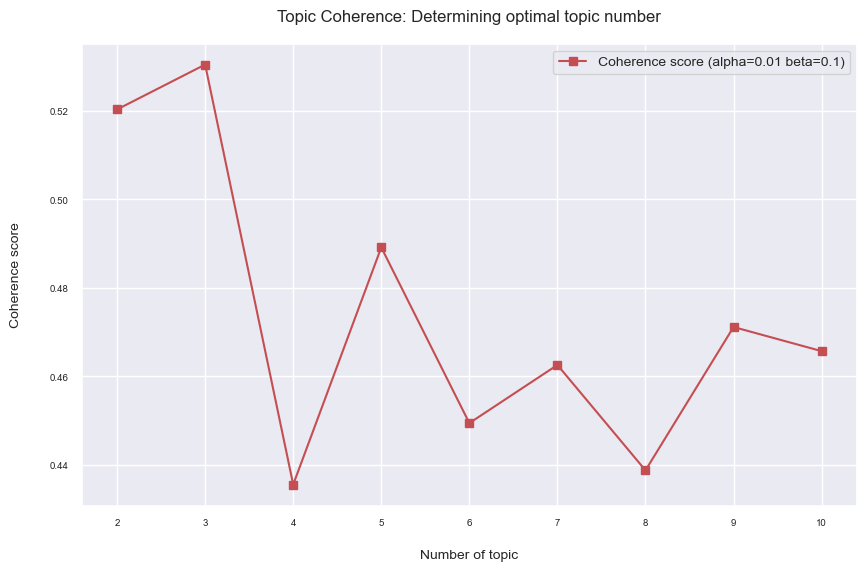

In [62]:
import matplotlib.pyplot as plt  
  
plt.figure(figsize=(10, 6), dpi=100, linewidth = 2)  
plt.plot(topic_nums, coherences, 's-', color = 'r', label="Coherence score (alpha=0.01 beta=0.1)")  
plt.title("Topic Coherence: Determining optimal topic number", x=0.5, y=1.03)  
plt.xticks(fontsize=7)  
plt.yticks(fontsize=7)  
plt.xlabel("Number of topic", fontsize=10, labelpad = 15)  
plt.ylabel("Coherence score", fontsize=10, labelpad = 20)  
  
plt.legend(loc = "best", fontsize=10)  
plt.show()  

In [58]:
target_topic_num = 3  
target_collection = []  
for k, a, b, c in zip(model_results['Topics'], model_results['Alpha'], model_results['Beta'], model_results['Coherence']):  
    if k == target_topic_num:  
        target_collection.append((a, b, c))  
          
target_collection = sorted(target_collection, key=lambda t: t[2], reverse=True)  
target_collection[:10]  

[(0.61, 0.9099999999999999, 0.5602942984539263),
 (0.61, 0.61, 0.5601117453384062),
 (0.9099999999999999, 0.61, 0.5588932108596267),
 ('asymmetric', 0.9099999999999999, 0.5554690467316137),
 ('asymmetric', 0.01, 0.5544953795460135),
 ('asymmetric', 0.31, 0.5544306539481654),
 ('asymmetric', 0.61, 0.5544306539481654),
 ('asymmetric', 'symmetric', 0.5544306539481654),
 (0.9099999999999999, 0.31, 0.5542988076850608),
 (0.9099999999999999, 'symmetric', 0.5542988076850607)]

In [59]:
import plotly.graph_objects as go  
  
a_values = []  
b_values = []  
c_values = []  
for a, b, c in target_collection[:10]:  
    a_values.append(a)  
    b_values.append(b)  
    c_values.append(c)  
      
fig = go.Figure(data=[  
                        go.Table(header=dict(values=['Alpha', 'Belta', 'Coherence']),  
                        cells=dict(values=[a_values, b_values, c_values]))  
                     ])  
fig.show()  

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [60]:
best_co = target_collection[0][2]  
improve_pert = (best_co - coherence_lda) * 100 / coherence_lda  
print("Coherence score is improved by {:.01f}%".format(improve_pert))  

Coherence score is improved by 20.2%


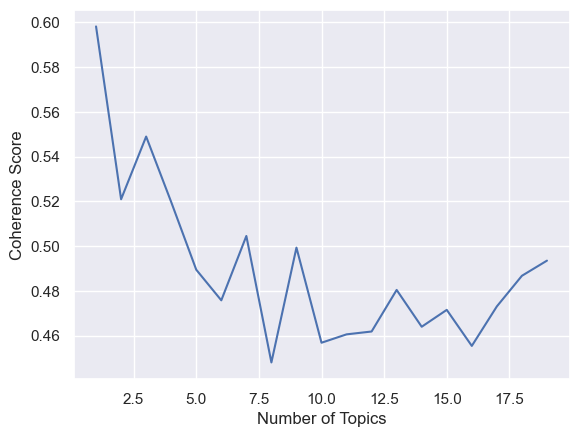

In [61]:
# Calculating Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = tweets['Tweet'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [28]:
# Setting the number of topics as 10
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=100)

In [29]:
lda_model

In [30]:
# Printing the topics
lda_model.print_topics(-1)

[(0,
  '0.246*"coronavirus" + 0.230*"china" + 0.092*"wuhan" + 0.085*"de" + 0.066*"la" + 0.048*"en" + 0.048*"el" + 0.037*"country" + 0.035*"outbreak" + 0.020*"doctor"'),
 (1,
  '0.323*"coronavirus" + 0.137*"case" + 0.088*"death" + 0.063*"chinese" + 0.058*"outbreak" + 0.054*"confirm" + 0.054*"health" + 0.054*"new" + 0.035*"wuhan" + 0.022*"repo"'),
 (2,
  '0.079*"coronavirus" + 0.078*"closure" + 0.078*"hong" + 0.078*"kong" + 0.077*"border" + 0.076*"strike" + 0.076*"worker" + 0.060*"china" + 0.060*"day" + 0.059*"hospital"'),
 (3,
  '0.086*"kong" + 0.086*"hong" + 0.073*"border" + 0.068*"medical" + 0.068*"city" + 0.068*"strike" + 0.068*"worker" + 0.064*"demand" + 0.060*"close" + 0.058*"china"'),
 (4,
  '0.099*"hong" + 0.099*"kong" + 0.084*"anger" + 0.082*"coronavirus" + 0.063*"people" + 0.056*"handling" + 0.055*"government" + 0.049*"outbreak" + 0.042*"number" + 0.042*"ordinary"'),
 (5,
  '0.082*"hospital" + 0.081*"mainland" + 0.078*"border" + 0.078*"china" + 0.076*"demand" + 0.075*"go" + 0.0

In [59]:
# Creating some random topics

topics = [ ['social distance', 'mask', 'sanitizer', 'wash', 'test','vaccine', 'booster'],
           ['healthcare', 'medicine', 'doctor', 'health', 'hospital', 'treatment'],
           ['covid','covid-19', 'coronavirus', '2019n-Cov'],
           ['symptom', 'fear', 'headache', 'body aches', 'cough', 'dead'] ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( tweets['Tweet'] )

# Coherence model
cm = CoherenceModel(topics=topics, 
                    texts=tweets['Tweet'],
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

ValueError: unable to interpret topic as either a list of tokens or a list of ids

In [ ]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(2,30) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Blues', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()